<center><h1><b style="color:lightblue;">👩🏻‍💻 NLP Project Amazon</b></h1></center>

In [333]:
# Import libraries
import re
import nltk 
import numpy as np
import pandas as pd
from PIL import Image
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from textblob import Word , TextBlob
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format',lambda x: '%.2f' % x)

<!DOCTYPE html>
<html>
<body>
        <h2><b style="color:lightblue;">       Content:</b></h2>
        <ul>
            <li><b style="color:lightblue;">1) Dating Data</b></li>
            <li><b style="color:lightblue;">2) Data Preprocessing</b></li>
            <li><b style="color:lightblue;">3) Visualization</b></li>
            <li><b style="color:lightblue;">4) Sentiment Intensity Analyzer</b></li>
            <li><b style="color:lightblue;">5) Machine Learning Model</b></li>
            <li><b style="color:lightblue;">6) Model Hypertuning</b></li>
            <li><b style="color:lightblue;">7) Classification Report</b></li>
            <li><b style="color:lightblue;">8) Testing Model</b></li>
        </ul>
</body>
</html>

<center><h3><b style="color:lightblue;">1) Dating Data</b></h3></center>

In [402]:
# Let's import data frame
data = pd.read_excel('amazon.xlsx')

In [278]:
# Let's look at first 5 row
data.head()

,Star,HelpFul,Title,Review
0,5,0,looks great,Happy with it
1,5,0,Pattern did not align between the two panels.,Good quality material however the panels are m...
2,5,0,Imagery is stretched. Still fun.,Product was fun for bedroom windows.<br />Imag...
3,5,0,Que se ven elegantes muy finas,Lo unico que me gustaria es que sean un poco ...
4,5,0,Wow great purchase,Great bang for the buck I can't believe the qu...


In [403]:
# Data Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Star     5611 non-null   int64 
 1   HelpFul  5611 non-null   int64 
 2   Title    5559 non-null   object
 3   Review   5593 non-null   object
dtypes: int64(2), object(2)
memory usage: 175.5+ KB


In [280]:
# Let's Data shape
data.shape

(5611, 4)

In [281]:
# Let's check null value
data.isnull().sum()

Star        0
HelpFul     0
Title      52
Review     18
dtype: int64

<center><h3><b style="color:lightblue;">2) Data Preprocessing </b></h3></center>

In [282]:
# Firstly let's convert case to lower case (for example lower case, may be upper case)
data['Review'] = data['Review'].str.lower()

In [283]:
# Let's remove dot symbols from text 
data['Review'] = data['Review'].apply(lambda x: re.sub(r'[^a-zA-Z0-9 ]', '', str(x)))

In [284]:
# Now, let's check data which contains number value
data[data['Review'].fillna('null').str.contains('\d', regex=True)].iloc[0]['Review']

'these are curtains just as the picture shows this is my 3rd set of ambesonne curtains i have one set for i use for spring and summer one for autumn and now this set for christmas winter they are all very durable and the colors are very vibrant i recommend these curtains'

In [285]:
# Let's remove digit value from review text
data['Review'] = data['Review'].str.replace('[\d]', '')

<h8><b style="color:red;">Note: We can keep the number value more in technological product comments. For example, there is a smartphone product and there are different memory options, then numbers can be useful for us. For example: 64 GB product is not good. and so on. </b></h8>

In [286]:
# Let's extract stopwords from our text
# nltk.download('stopwords')
sw = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x:  ' '.join(x for x in str(x).split() if x not in sw))

<center><h8><b style="color:#FFFF88"> ❓What is stopwords🤔 </b></h8></center>

<center><h8><b style="color:lightgreen">Stopwords are the glue words in language, like "the," "and," or "in." They help sentences flow smoothly by connecting ideas. In text analysis, they're often removed to focus on meaningful words.</b></h8></center>

In [287]:
# Let's look at stopwords list
print('· Stopwords:')
for index,word in enumerate(sw):
    print(f'{index+1}) {word}')

· Stopwords:
1) i
2) me
3) my
4) myself
5) we
6) our
7) ours
8) ourselves
9) you
10) you're
11) you've
12) you'll
13) you'd
14) your
15) yours
16) yourself
17) yourselves
18) he
19) him
20) his
21) himself
22) she
23) she's
24) her
25) hers
26) herself
27) it
28) it's
29) its
30) itself
31) they
32) them
33) their
34) theirs
35) themselves
36) what
37) which
38) who
39) whom
40) this
41) that
42) that'll
43) these
44) those
45) am
46) is
47) are
48) was
49) were
50) be
51) been
52) being
53) have
54) has
55) had
56) having
57) do
58) does
59) did
60) doing
61) a
62) an
63) the
64) and
65) but
66) if
67) or
68) because
69) as
70) until
71) while
72) of
73) at
74) by
75) for
76) with
77) about
78) against
79) between
80) into
81) through
82) during
83) before
84) after
85) above
86) below
87) to
88) from
89) up
90) down
91) in
92) out
93) on
94) off
95) over
96) under
97) again
98) further
99) then
100) once
101) here
102) there
103) when
104) where
105) why
106) how
107) all
108) any
10

In [288]:
# Let's extract the rare words from review text
word_count = pd.Series(' '.join(data['Review']).split()).value_counts()
rare = word_count[word_count <= 1]
data['Review'] = data['Review'].apply(lambda x: ' '.join(x for x in x.split() if x not in rare))

<center><h8><b style="color:#FFFF88"> ❓What is difference between stopwords and rare words🤔 </b></h8></center>

<center><h8><b style="color:lightgreen">Rare words are infrequently occurring terms that often carry significant meaning or context. They represent specialized terminology or unique concepts within a dataset. Stopwords, on the other hand, are common words that appear frequently in language but contribute little semantic meaning. They are typically filtered out during text analysis to focus on more meaningful content words.</b></h8></center>

In [289]:
# Let's look at rare words' lists
print('· Rare Words:')
for index,word in enumerate(rare.index):
    print(f'{index+1}) {word}')

· Rare Words:
1) maby
2) inour
3) photinia
4) cab
5) driving
6) puse
7) closedbr
8) filtration
9) hamaca
10) perception
11) bush
12) lowes
13) cou
14) stupid
15) ches
16) shielding
17) 0illows
18) atrocious
19) production
20) periodically
21) eh
22) hoopbrick
23) existent
24) backhighly
25) discernible
26) improve
27) apti
28) horribly
29) milky
30) vaporwave
31) click
32) burgundy
33) drunk
34) port
35) informative
36) companybrbr
37) bitbrbrwere
38) regulate
39) spiral
40) downtown
41) definitive
42) prettywhen
43) mill
44) curtaintruly
45) classic
46) hisbrroom
47) guaranteed
48) kitchenette
49) preference
50) amazingbrbrthe
51) imagebrbrwhen
52) blossoms
53) neater
54) limited
55) ripping
56) roombrmaterial
57) youkeep
58) perform
59) flip
60) guestroom
61) zombies
62) anyhowmy
63) hardware
64) oooooh
65) designsbrperfect
66) fallen
67) everythingbrlooks
68) toys
69) basis
70) pathway
71) nbspmuch
72) offroad
73) rickety
74) recipient
75) justified
76) creatures
77) curatin
78) mr


In [290]:
# lemmatize or Stremming
# nltk.download('wordnet')
# Lemmatize
data['Review'] = data['Review'].apply(lambda x: ' '.join([Word(word).lemmatize() for word in x.split()]))
# Stremming
# data['Review'] = data['Review'].apply(lambda x: ' '.join([PorterStemmer().stem(word) for word in x.split()]))

<center><h8><b style="color:#FFFF88"> ❓What is Lemmatize🤔 </b></h8></center>

<center><h8><b style="color:lightgreen">Stemming and lemmatization are both techniques used in natural language processing (NLP) to reduce words to their base or root forms. They are employed to normalize text, which helps in tasks such as text analysis, information retrieval, and machine learning. </b></h8></center>

<center><h3><b style="color:lightblue;">3) Visualization </b></h3></center>

In [291]:
# Let's find word count
tf = data['Review'].apply(lambda x: pd.value_counts(x.split())).sum(axis = 0).reset_index()
tf.columns = ['Word','tf']

In [292]:
# Let's sort words by counts
tf.sort_values("tf" , ascending = False , inplace = True)
tf.reset_index(inplace = True , drop = True)

In [293]:
# Let's find more than 500 common words
tf = tf[tf['tf'] > 500]

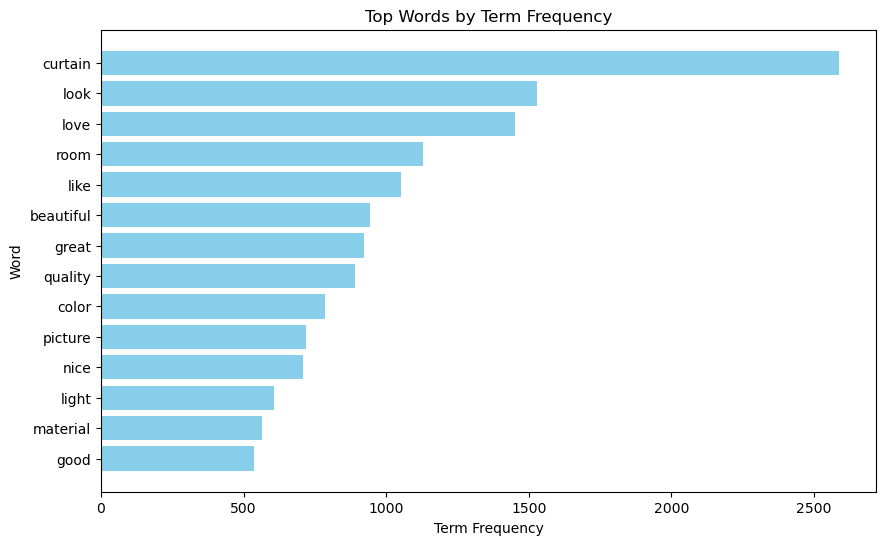

In [294]:
# Visualize words and their numbers
top_words = tf['Word']
tf_values = tf['tf']

plt.figure(figsize=(10, 6))
plt.barh(range(len(top_words)), tf_values, tick_label=top_words, color='skyblue')
plt.xlabel('Term Frequency')
plt.ylabel('Word')
plt.title('Top Words by Term Frequency')
plt.gca().invert_yaxis() 
plt.show()

In [295]:
# Top 10 the most ngrams( 2 words )
from collections import Counter
bigram_counter = Counter()
for review in data['Review']:
    words = review.split()
    review_bigrams = zip(words[:-1], words[1:])
    bigram_counter.update(review_bigrams)

for bigram, count in bigram_counter.items():
    print(f"{bigram[0]} {bigram[1]} - {count}")

good quality - 172
quality material - 74
material however - 2
however panel - 1
product fun - 1
fun bedroom - 1
bedroom windowsbr - 1
windowsbr imagery - 1
imagery bit - 1
bit stretched - 1
stretched still - 1
still material - 1
material lightweight - 1
lightweight sheer - 1
sheer appreciate - 1
lo que - 2
que e - 1
e que - 1
que un - 1
un poco - 2
poco ma - 1
great bang - 1
bang buck - 3
buck cant - 1
cant believe - 2
believe quality - 1
material vibrant - 4
vibrant color - 45
color style - 1
style work - 1
work beautifully - 1
beautifully tie - 1
tie together - 1
look different - 7
different photo - 2
exactly looking - 20
looking heavy - 1
heavy material - 17
material great - 18
great price - 20
price fast - 1
looking picture - 4
picture thought - 1
thought curtain - 4
curtain would - 25
would thinner - 1
thinner sheer - 1
sheer nice - 2
nice thickness - 4
thickness weight - 1
weight help - 1
help insulate - 1
insulate front - 1
front window - 11
window look - 12
look absolutely - 6


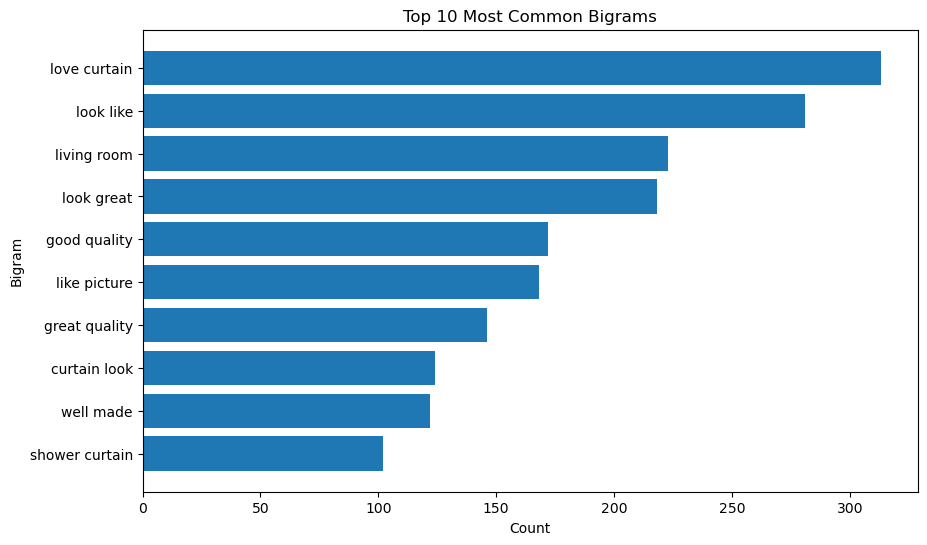

In [296]:
# Visualize bigrams and their numbers
bigram_counter = Counter()
for review in data['Review']:
    words = review.split()
    review_bigrams = zip(words[:-1], words[1:])
    bigram_counter.update(review_bigrams)

top_n_bigrams = bigram_counter.most_common(10) 
bigrams, counts = zip(*top_n_bigrams)

plt.figure(figsize=(10, 6))
plt.barh(range(len(bigrams)), counts, tick_label=[f"{bigram[0]} {bigram[1]}" for bigram in bigrams])
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Top 10 Most Common Bigrams')
plt.gca().invert_yaxis()  
plt.show()

· How many maximum words to visualize? 
· Enter the number of words: 50


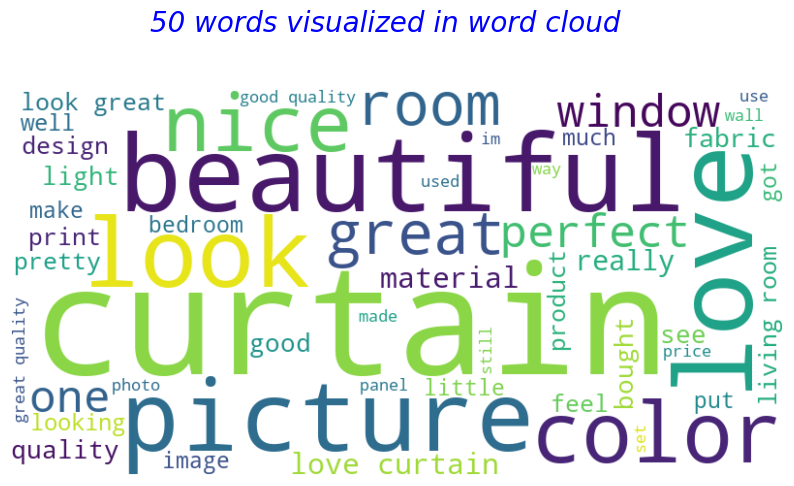

In [297]:
# WordCloud Visualization
word_count = int(input('· How many maximum words to visualize? \n· Enter the number of words: '))
all_feedbacks = ' '.join(data['Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words = word_count).generate(all_feedbacks)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.suptitle(f"{word_count} words visualized in word cloud", fontsize=20, fontstyle='italic', color='blue', y=0.95)
plt.axis('off')
plt.show()

· How many maximum words to visualize? 
· Enter the number of words: 245


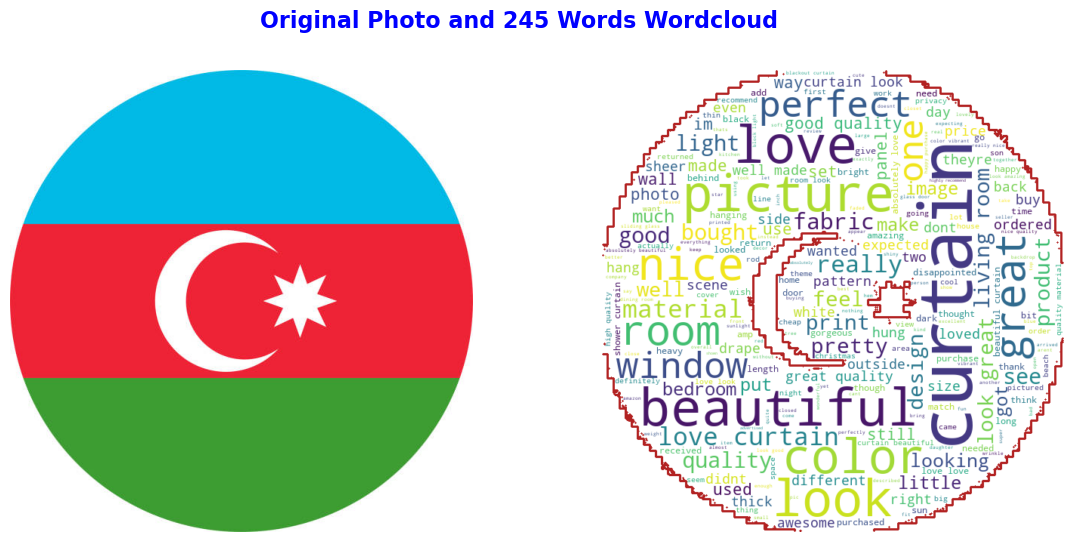

In [298]:
word_count = int(input('· How many maximum words to visualize? \n· Enter the number of words: '))
az_mask = np.array(Image.open('Azerbaijan.jpg'))
wordcloud = WordCloud(mask=az_mask, background_color='white',max_words = word_count,contour_width= 3,contour_color= "firebrick").generate(all_feedbacks)

plt.figure(figsize=(14, 6))

# Plot the first image (az_mask)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
plt.imshow(az_mask)
plt.axis('off')

# Plot the second image (wordcloud)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.suptitle(f'Original Photo and {word_count} Words Wordcloud', fontsize=16, fontweight='bold' ,color = 'blue')
plt.show()

<center><h3><b style="color:lightblue;">4) Sentiment Intensity Analyzer </b></h3></center>

In [299]:
# Sentiment Analyze
# nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

In [300]:
# Let's look at pattern then apply to review column
pattern_sentence = 'I love this curtain becouse this curtain is beautiful'
sia.polarity_scores(pattern_sentence)

{'neg': 0.0, 'neu': 0.426, 'pos': 0.574, 'compound': 0.8442}

In [301]:
# Main parametr is compound
sia.polarity_scores(pattern_sentence)['compound']

0.8442

In [302]:
# Let's create little procedure
def find_sentiment(sentences):
    compound = sia.polarity_scores(str(sentences))['compound']
    if compound > 0:
        print(f"• Result: '{pattern_sentence}' is a positive sentence and compound value is {compound}")
    elif compund == 0:
        print(f"• Result: '{pattern_sentence}' is a neutral sentence and compound value is {compound}")
    else:
        print(f"• Result: '{pattern_sentence}' is a negative sentence and compound value is {compound}")
        
find_sentiment(pattern_sentence)

• Result: 'I love this curtain becouse this curtain is beautiful' is a positive sentence and compound value is 0.8442


In [303]:
# Let's apply to our review column
data['Polarity'] = data['Review'].apply(lambda x: sia.polarity_scores(x)['compound'] )
data['Polarity Label'] = data['Polarity'].apply(lambda x: 'Positive' if x > 0.1 else 'Negative')

In [304]:
# Let's look at the distribution
data['Polarity Label'].value_counts()

Polarity Label
Positive    4734
Negative     877
Name: count, dtype: int64

In [305]:
data[['Polarity','Polarity Label']]

,Polarity,Polarity Label
0,0.57,Positive
1,0.44,Positive
2,0.72,Positive
3,0.00,Negative
4,0.90,Positive
...,...,...
5606,0.77,Positive
5607,0.00,Negative
5608,0.79,Positive
5609,0.84,Positive


<center><h3><b style="color:lightblue;">5) Machine Learning Model </b></h3></center>

In [306]:
# Let's do label encoder for Polarity Label
data['Polarity Label'] = LabelEncoder().fit_transform(data['Polarity Label'])

In [307]:
X = data['Review']
y = data['Polarity Label']

<center><h8><b style="color:#FFFF88"> ❓What is Vectorizer🤔 </b></h8></center>

<center><h8><b style="color:lightgreen">A vectorizer in natural language processing (NLP) converts textual data into numerical vectors, facilitating machine learning algorithms' processing of text. Common types include CountVectorizer, TF-IDF Vectorizer, Word Embeddings, and HashingVectorizer, each with unique characteristics and applications.</b></h8></center>

In [308]:
# Word Count Vectorizer
corpus = ['This is a dog', 'This is a cat']

vectorizer = CountVectorizer()
X_c = vectorizer.fit_transform(corpus)

feature_names = vectorizer.get_feature_names_out()
print(feature_names)

X_c.toarray()

['cat' 'dog' 'is' 'this']


array([[0, 1, 1, 1],
       [1, 0, 1, 1]], dtype=int64)

In [309]:
# Ngrams count vectorizer
corpus = ['This is a dog', 'This is a cat']

vectorizer = CountVectorizer(analyzer = 'word', ngram_range = (2,3))
X_c = vectorizer.fit_transform(corpus)

feature_names = vectorizer.get_feature_names_out()
print(feature_names)

X_c.toarray()

['is cat' 'is dog' 'this is' 'this is cat' 'this is dog']


array([[0, 1, 1, 0, 1],
       [1, 0, 1, 1, 0]], dtype=int64)

In [310]:
# Let's apply to review column
vectorizer = CountVectorizer()
X_count = vectorizer.fit_transform(X)

In [311]:
X_count.toarray()[4:7]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [312]:
# TF-IDF --> Word
tfidfVectorizer = TfidfVectorizer()
x_tfidfWord = tfidfVectorizer.fit_transform(X)

In [313]:
# TF-IDF --> Ngrams
tfidfVectorizer = TfidfVectorizer(ngram_range = (2,3))
x_tfidfngram = tfidfVectorizer.fit_transform(X)

In [314]:
x_tfidfWord.toarray()[4:5]

array([[0., 0., 0., ..., 0., 0., 0.]])

In [315]:
# Let's create model
log_model = LogisticRegression().fit(x_tfidfWord,y)

In [316]:
# Let's find accuracy of model
cross_val_score(log_model,x_tfidfWord,y,scoring = "accuracy", cv = 5).mean()

0.8925317815946908

In [317]:
# Test Model with new value
new_review = pd.Series('Everything is good')
# Then we must be vectorize new review for input value
new_review = TfidfVectorizer().fit(X).transform(new_review)
# In the end, we enter review to model and i get output
log_model.predict(new_review)

array([1])

In [398]:
# Let's create random forest mode for this case
rf_model = RandomForestClassifier().fit(x_tfidfWord,y)
# Let's find accuracy of model
cross_val_score(rf_model,x_tfidfWord,y,scoring = "accuracy", cv = 5).mean()

0.9132075561544944

In [328]:
# Let's check for ngrams
rf_model = RandomForestClassifier().fit(x_tfidfngram,y)
# Accuracy for Ngrams input
cross_val_score(rf_model,x_tfidfngram,y,scoring = "accuracy", cv = 5).mean()


KeyboardInterrupt



<center><h3><b style="color:lightblue;">6) Model Hypertuning </b></h3></center>

In [323]:
# Model Random Search ~ Hypertuning
param_dist = {
    'n_estimators': [50, 150,200],  
    'max_depth': [None, 2,5,7,9,12],  
    'min_samples_split': [5, 10,12,16], 
    'min_samples_leaf': [2,4,5,6] 
}

rf_model = RandomForestClassifier()

random_search = RandomizedSearchCV(
    estimator=rf_model, 
    param_distributions=param_dist, 
    n_iter=10,
    cv=5, 
    scoring='accuracy', 
    random_state=17
).fit(x_tfidfngram, y)

In [325]:
# Let's check model with the best parametrs and look at result accuracy
rf_final = random_search.best_estimator_.fit(x_tfidfngram, y)
cross_val_score(rf_final,x_tfidfngram,y,scoring = "accuracy", cv = 5).mean()

0.8474426312255657

<center><h3><b style="color:lightblue;">7) Classification Report </b></h3></center>

In [361]:
# Let's divide dataframe to train and test dataset
train_x , test_x , train_y , test_y =  train_test_split(X ,y , random_state = 42)

In [362]:
# Let's convert input x to vector
tfidfVectorizer = TfidfVectorizer().fit(train_x)
x_train_tfidfWord = tfidfVectorizer.transform(train_x)
x_test_tfidfWord = tfidfVectorizer.transform(test_x)

In [363]:
# Let's create logistic regression model
log_model = LogisticRegression().fit(x_train_tfidfWord,train_y)
# Let's predict X test dataset
y_pred = log_model.predict(x_test_tfidfWord)
# Let's check accuracy score
cross_val_score(log_model,x_test_tfidfWord,test_y,scoring = "accuracy", cv = 5).mean()

0.8503253685815964

In [364]:
report_lr = classification_report(test_y, y_pred)
print(report_lr)

              precision    recall  f1-score   support

           0       0.92      0.35      0.51       233
           1       0.89      0.99      0.94      1170

    accuracy                           0.89      1403
   macro avg       0.90      0.67      0.72      1403
weighted avg       0.89      0.89      0.87      1403



In [365]:
# Random Forest Model Classification Report

In [368]:
# Let's create random forest model
rf_model = RandomForestClassifier().fit(x_train_tfidfWord,train_y)
# Let's predict X test dataset
y_pred = rf_model.predict(x_test_tfidfWord)
# Let's check accuracy score
cross_val_score(rf_model,x_test_tfidfWord,test_y,scoring = "accuracy", cv = 5).mean()

0.8909456024402644

In [369]:
# Let's look at classification_report
report_rf = classification_report(test_y, y_pred)
print(report_rf)

              precision    recall  f1-score   support

           0       0.80      0.56      0.66       233
           1       0.92      0.97      0.94      1170

    accuracy                           0.90      1403
   macro avg       0.86      0.77      0.80      1403
weighted avg       0.90      0.90      0.90      1403



<center><h3><b style="color:lightblue;">8) Testing Model </b></h3></center>

In [384]:
# Let's choose 5 review and test its
review_1 = [data['Review'].loc[23]]
review_2 = [data['Review'].loc[46]]
review_3 = [data['Review'].loc[57]]
review_4 = [data['Review'].loc[79]]
review_5 = [data['Review'].loc[99]]

In [385]:
# Let's convert to vector
vec_review_1 = TfidfVectorizer().fit(train_x).transform(review_1)
vec_review_2 = TfidfVectorizer().fit(train_x).transform(review_2)
vec_review_3 = TfidfVectorizer().fit(train_x).transform(review_3)
vec_review_4 = TfidfVectorizer().fit(train_x).transform(review_4)
vec_review_5 = TfidfVectorizer().fit(train_x).transform(review_5)

In [389]:
output_review_1 = rf_model.predict(vec_review_1)
output_review_2 = rf_model.predict(vec_review_2)
output_review_3 = rf_model.predict(vec_review_3)
output_review_4 = rf_model.predict(vec_review_4)
output_review_5 = rf_model.predict(vec_review_5)

In [396]:
# Let's look at results and check up
for i in range(1, 6):  
    prediction = globals()[f'output_review_{i}']
    print(f"Review {i}: {globals()[f'review_{i}']}")
    print(f"Output for review {i}: {prediction}")
    print("Positive" if prediction[0] == 1 else "Negative")
    print('|===============================================|')

Review 1: ['great material printing material']
Output for review 1: [1]
Positive
|===============================================|
Review 2: ['somebody please post picture would love see really get meet description thanx']
Output for review 2: [1]
Positive
|===============================================|
Review 3: ['love']
Output for review 3: [1]
Positive
|===============================================|
Review 4: ['look great bedroom']
Output for review 4: [1]
Positive
|===============================================|
Review 5: ['better expected fit window wish bit wider love surprising visitor']
Output for review 5: [1]
Positive
|===============================================|


<center><h8><b style="color:#FFFF88"> 😉 Good Job 👌🏻 </b></h8></center>

<center><h3><b style="color:lightblue;"> The End </b></h3></center>